In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import cv2
import matplotlib.pyplot as plt
import os
import seaborn as sns
import umap
from PIL import Image
from scipy import misc
import imageio
from os import listdir
from os.path import isfile, join
import numpy as np
import scipy.misc
from random import shuffle
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils.np_utils import to_categorical

import numpy 
from sklearn import metrics
import time
from sklearn.metrics import classification_report

Using TensorFlow backend.


In [3]:
os.chdir(r"C:\Users\Dazzyl\ML lreaning DEEP LEARN A-Z\ML\gender\UTKFace") 


In [5]:
onlyfiles = os.listdir()
len(onlyfiles)
shuffle(onlyfiles)
gender = [i.split('_')[1] for i in onlyfiles]

In [6]:
classes = []
for i in gender:
    i = int(i)
    classes.append(i)

In [7]:
X_data =[]
for file in onlyfiles:
    face = imageio.imread(file)
    face = cv2.resize(face, (32, 32) )
    X_data.append(face)

In [8]:
X = np.squeeze(X_data)


In [9]:
X.shape


(23708, 32, 32, 3)

In [10]:
# normalize data
X = X.astype('float32')
X /= 255

[[[[0.23529412 0.23529412 0.20392157]
   [0.1882353  0.14117648 0.09411765]
   [0.17254902 0.09019608 0.03921569]
   ...
   [0.11764706 0.05490196 0.03529412]
   [0.10196079 0.04313726 0.01568628]
   [0.16862746 0.10588235 0.05490196]]

  [[0.20784314 0.21176471 0.18039216]
   [0.17254902 0.1254902  0.07843138]
   [0.16078432 0.07450981 0.02352941]
   ...
   [0.07843138 0.02352941 0.        ]
   [0.10588235 0.04705882 0.02745098]
   [0.12941177 0.06666667 0.01568628]]

  [[0.20784314 0.21176471 0.18039216]
   [0.17254902 0.12941177 0.08235294]
   [0.2        0.11372549 0.0627451 ]
   ...
   [0.12156863 0.06666667 0.01960784]
   [0.09411765 0.03921569 0.02352941]
   [0.11372549 0.05098039 0.00392157]]

  ...

  [[0.25490198 0.24705882 0.2509804 ]
   [0.25490198 0.23137255 0.23921569]
   [0.27450982 0.24313726 0.2509804 ]
   ...
   [0.50980395 0.0627451  0.02352941]
   [0.45882353 0.08627451 0.07450981]
   [0.29411766 0.01568628 0.        ]]

  [[0.21960784 0.24705882 0.23921569]
   [0.2

In [11]:
classes[:10]


[1, 0, 1, 1, 1, 1, 1, 0, 1, 1]

In [12]:
categorical_labels = to_categorical(classes, num_classes=2)


In [13]:
categorical_labels[:10]


array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [40]:
(x_train, y_train), (x_test, y_test) = (X[:15008],categorical_labels[:15008]) , (X[15008:] , categorical_labels[15008:])
(x_valid , y_valid) = (x_test[:7000], y_test[:7000])
(x_test, y_test) = (x_test[7000:], y_test[7000:])

In [41]:
len(x_train)+len(x_test) + len(x_valid) == len(X)


True

In [42]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(32,32,3))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(2, activation='sigmoid'))

# Take a look at the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 64)        832       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 32)        8224      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2048)             

In [43]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.compile(loss='hinge', optimizer='adam', metrics=['accuracy','AUC'])
#model.compile(loss='squared_hinge', optimizer='adam', metrics=['accuracy'])

#model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.save_weights('model.h5')
          
            

In [46]:
#epoch  changing

k=1
batch_i= 64
epoch_i =35
score_array =[]
start = time.time()

while k<=1:
    batch_size=batch_i
    epochs=epoch_i
    history  = model.fit(x_train,
         y_train,
         batch_size,
         epochs,
         validation_data=(x_valid, y_valid),)
    
    score = model.evaluate(x_test, y_test, verbose=0)    
    print('\n', 'Test accuracy:', score[1], "Batch size: ",batch_i )  
    score_array.append([score[1]])
    batch_array.append(k)
    model.load_weights('model.h5')    

    k += 1

print("Total time: ", time.time() - start, "seconds")
print('\n')

predTest = model.predict(x_valid)
predTest = (predTest > 0.5)
print(metrics.classification_report(y_valid, predTest,digits=2))  

x = numpy.std(score_array)
print('STd:',x)

#plt.xlabel('Batch size')
#plt.ylabel('Test Accuracy')
#plt.plot(batch_array,score_array,'bo')


Train on 15008 samples, validate on 7000 samples
Epoch 1/35
15008/15008 [==============================] - 2s 121us/sample - loss: 0.6375 - accuracy: 0.6456 - val_loss: 0.5864 - val_accuracy: 0.7245
Epoch 2/35
15008/15008 [==============================] - 2s 160us/sample - loss: 0.5415 - accuracy: 0.7303 - val_loss: 0.4852 - val_accuracy: 0.7800
Epoch 3/35
15008/15008 [==============================] - 2s 142us/sample - loss: 0.4649 - accuracy: 0.7818 - val_loss: 0.4035 - val_accuracy: 0.8214
Epoch 4/35
15008/15008 [==============================] - 2s 139us/sample - loss: 0.4162 - accuracy: 0.8115 - val_loss: 0.3657 - val_accuracy: 0.8430
Epoch 5/35
15008/15008 [==============================] - 2s 109us/sample - loss: 0.3927 - accuracy: 0.8219 - val_loss: 0.3433 - val_accuracy: 0.8534
Epoch 6/35
15008/15008 [==============================] - 2s 116us/sample - loss: 0.3741 - accuracy: 0.8284 - val_loss: 0.3385 - val_accuracy: 0.8420
Epoch 7/35
15008/15008 [===========================

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


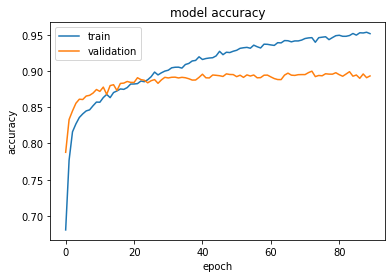

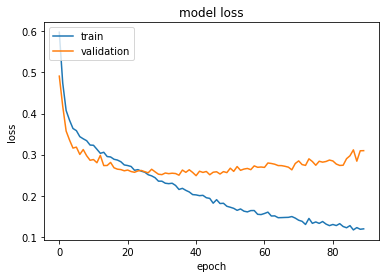

In [39]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "ROC-AOC"

In [30]:
print(score_array)


[[0.8888235], [0.89323527], [0.88529414], [0.89411765], [0.8867647], [0.88764703], [0.89411765], [0.88735294], [0.8938235], [0.8867647]]


In [37]:
predTest = model.predict(x_test)
predTest = (predTest > 0.5)
print(metrics.classification_report(y_test, predTest,digits=2)) 

              precision    recall  f1-score   support

           0       0.52      1.00      0.69       891
           1       0.38      0.29      0.33       809

   micro avg       0.48      0.66      0.56      1700
   macro avg       0.45      0.65      0.51      1700
weighted avg       0.45      0.66      0.52      1700
 samples avg       0.48      0.66      0.54      1700



D:\Pyhton\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.88941175


In [48]:
labels =["Male",  # index 0
        "Female",      # index 1
        ]

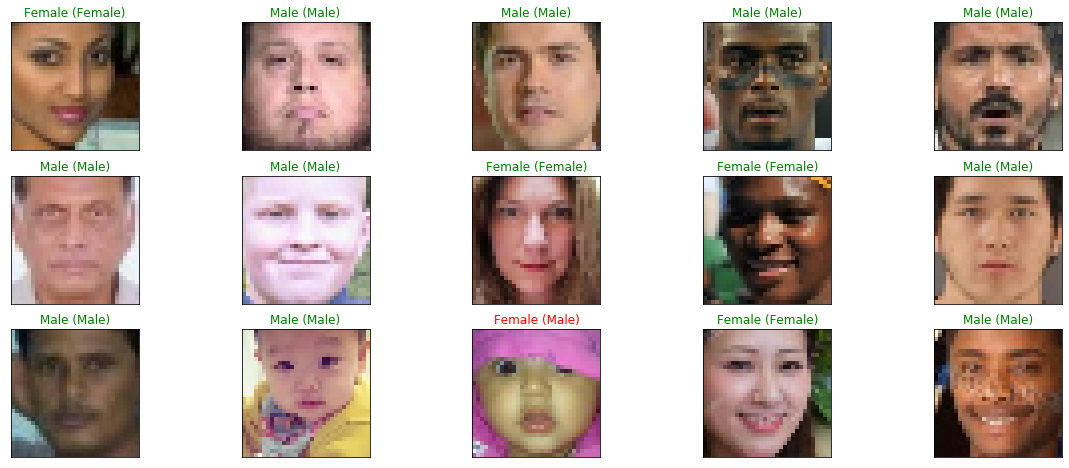

In [49]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()